In [1]:
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime, timedelta
from scipy import signal

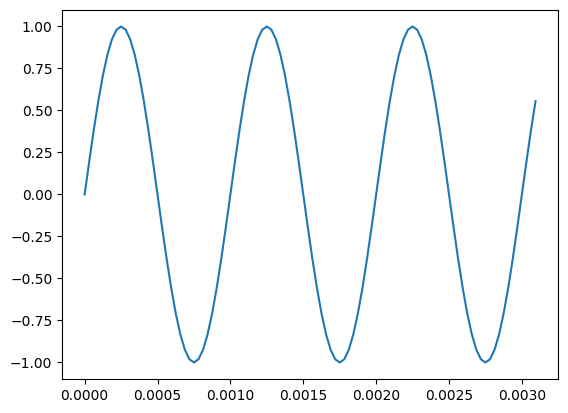

In [17]:
amplitude = 1
frequency = 1000  # Hz
duration = 10     # seconds
sample_rate = 32000  # Hz

# Generate time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate sine wave
signal0 = amplitude * np.sin(2 * np.pi * frequency * t)

plt.plot(t[0:100], signal0[0:100])
plt.show()

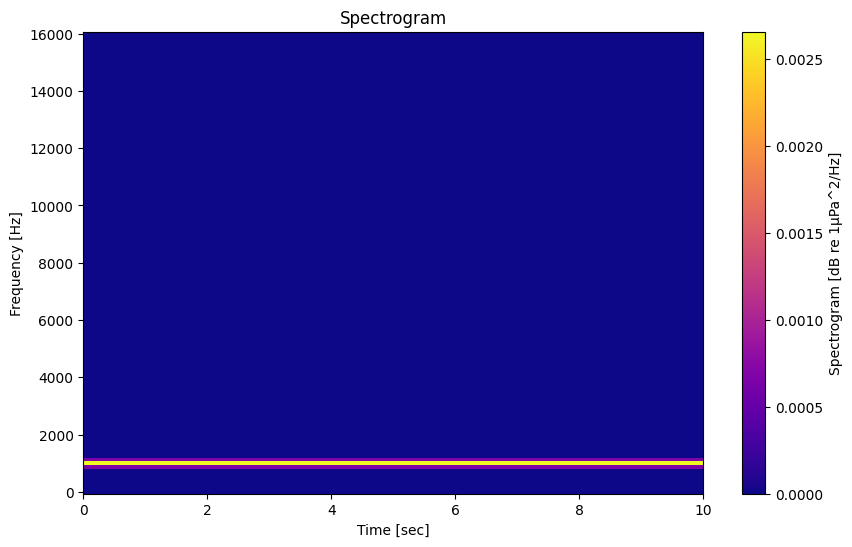

0.0026561697648812884


In [19]:
window_size = 256
win = signal.windows.hann(window_size)

f, t, Zxx = signal.spectrogram(signal0, sample_rate, window=win, nperseg=window_size, scaling='density', noverlap=0, return_onesided=True)
# DO NO USE STFT !!! NEVER !!!!!

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), cmap = 'plasma')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Spectrogram [dB re 1μPa^2/Hz]')
plt.title('Spectrogram')
# plt.savefig('Spectrogram1.png')
plt.show()

print(np.max(np.abs(Zxx)))

In [20]:
# Direct energy calculation for comparison
energy_direct_window = np.sum(np.abs(signal0[:window_size])**2) / sample_rate
print(f'Direct  in window: {energy_direct_window:.6f}')

# Method 2: Direct energy calculation
energy_direct_full = np.sum(np.abs(signal0)**2) / sample_rate
print(f'Direct Energy full: {energy_direct_full:.6f}')

Direct  in window: 0.004000
Direct Energy full: 5.000000


In [25]:
# aka 'Corrected Version (Recommended)'

df = f[1] - f[0]  # frequency resolution
dt = t[1] - t[0]  # time resolution

# Method 1: Proper STFT energy calculation
energy_stft = np.sum(np.sum(np.abs(Zxx), axis=0) * df) * dt
print(f'STFT Energy FULL: {energy_stft:.6f}')

energy_stft_window = np.sum(np.abs(Zxx[:,0])) * df * dt
print(f'STFT Energy in window: {energy_stft_window:.6f}')

STFT Energy FULL: 5.000001
STFT Energy in window: 0.004000
